In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

HOUSING_PATH = os.path.join("datasets", "housing")

def load_housing_data(housing_path=HOUSING_PATH) -> pd.DataFrame:
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

def split_train_test(data: pd.DataFrame, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [1]:
housing.describe()

NameError: name 'housing' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e552b10>,
      dtype=object)

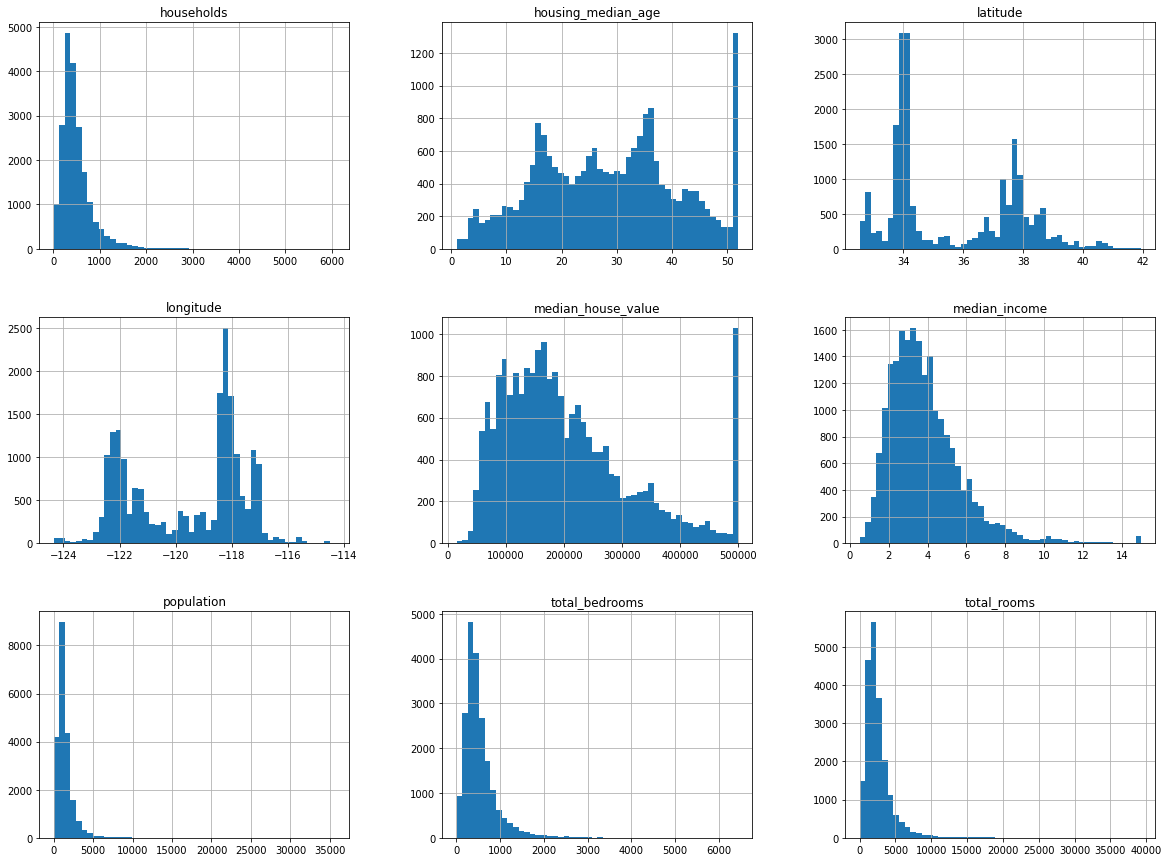

In [66]:
%matplotlib inline
import matplotlib as plt

housing.hist(bins=50, figsize=(20, 15))

In [81]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


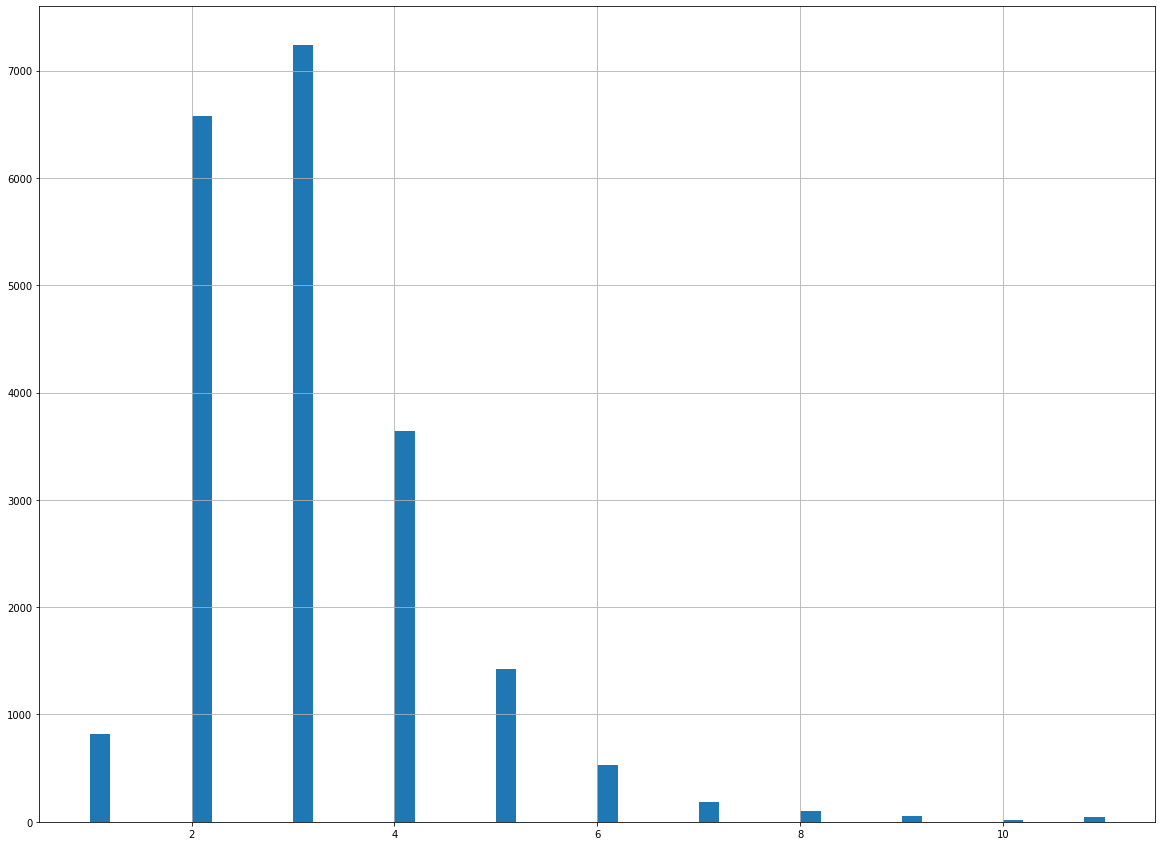

In [20]:
housing['income-cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income-cat'].hist(bins=50, figsize=(20, 15))

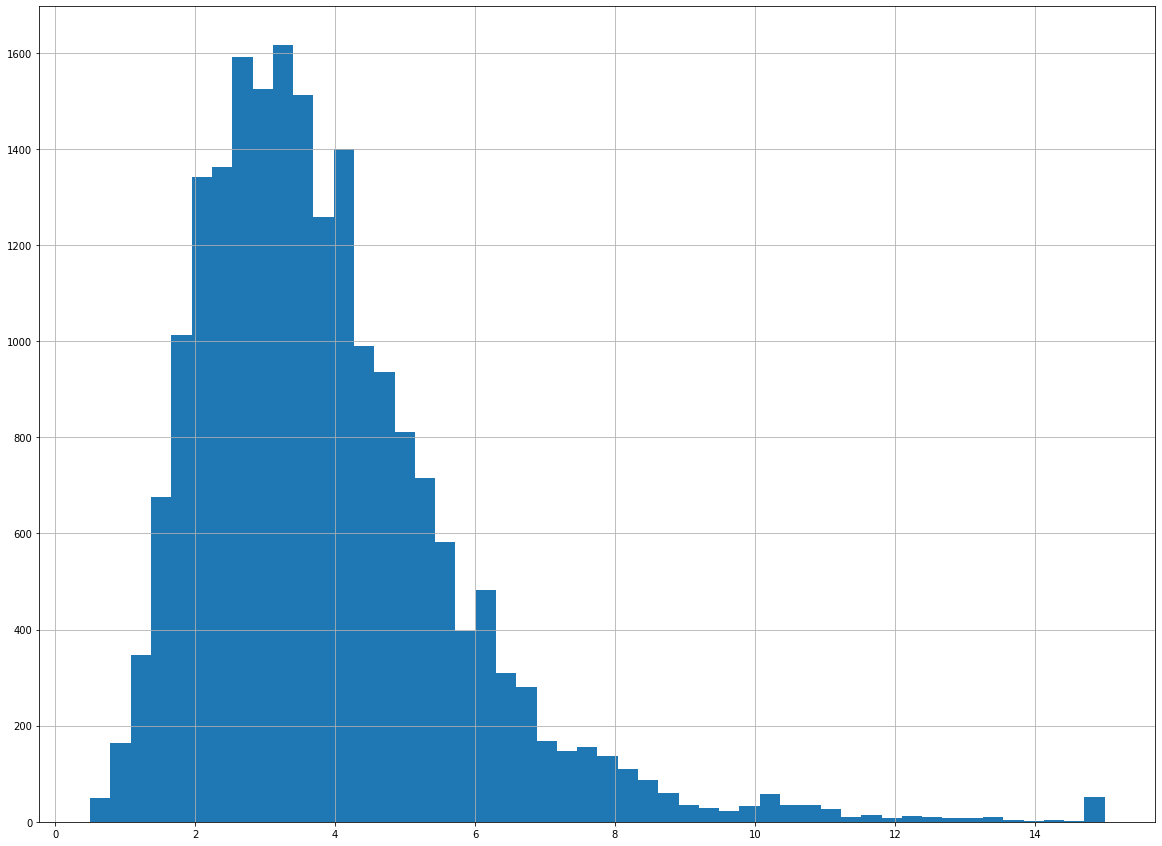

In [21]:
housing['median_income'].hist(bins=50, figsize=(20, 15))

3.0    0.070107
2.0    0.063760
4.0    0.035271
5.0    0.022917
1.0    0.007946
Name: income-cat, dtype: float64

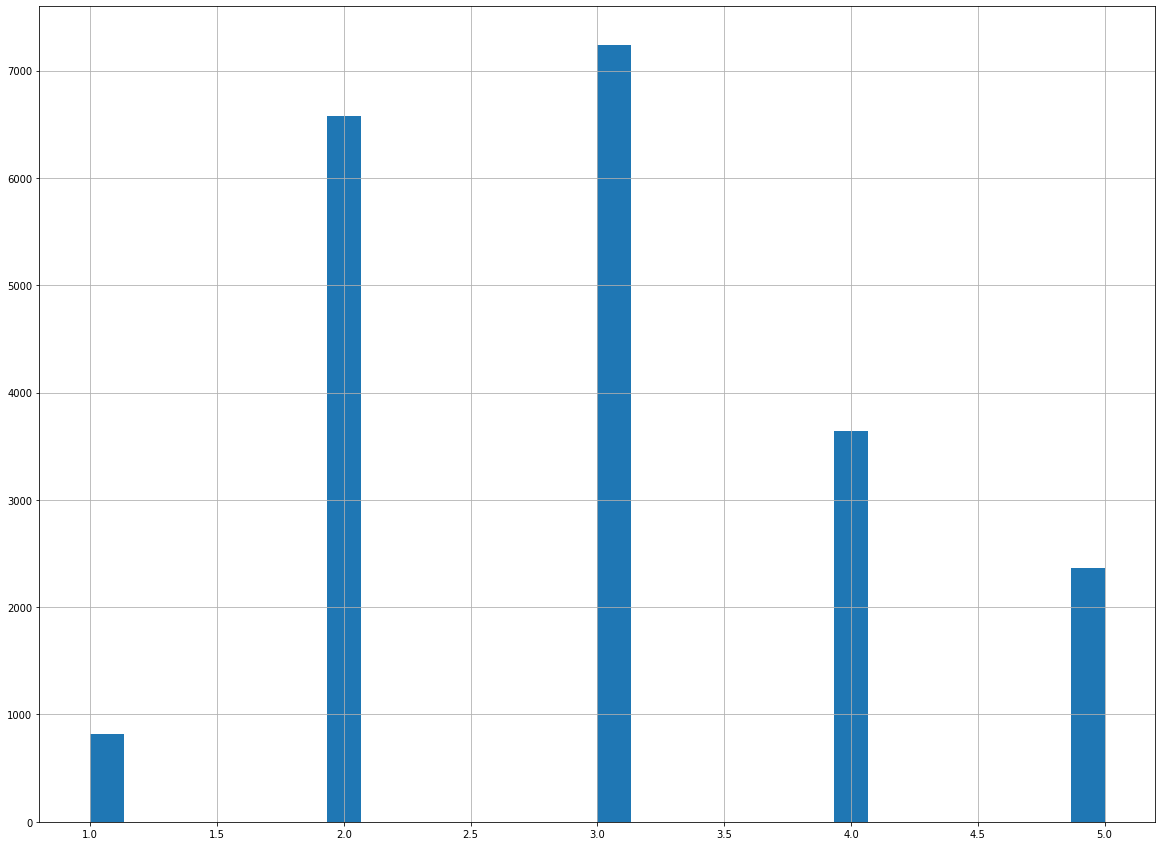

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)


housing['income-cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income-cat'].where(housing['income-cat'] < 5, 5.0, inplace=True)
housing['income-cat'].hist(bins=30, figsize=(20, 15))

strat_train_set, strat_test_set = [], []

for train_index, test_index in split.split(housing, housing['income-cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
    from IPython.display import display
    display(strat_test_set['income-cat'].value_counts() / len(housing))

    for set_ in (strat_train_set, strat_test_set):
        set_.drop('income-cat', axis=1, inplace=True)
    

In [23]:
housing['income-cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income-cat, dtype: float64

In [24]:
strat_train_set.info()
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null 

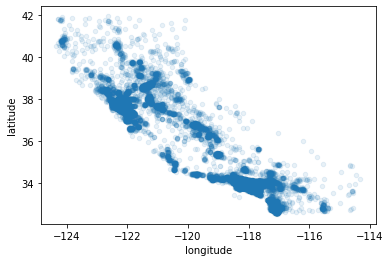

In [25]:
housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)

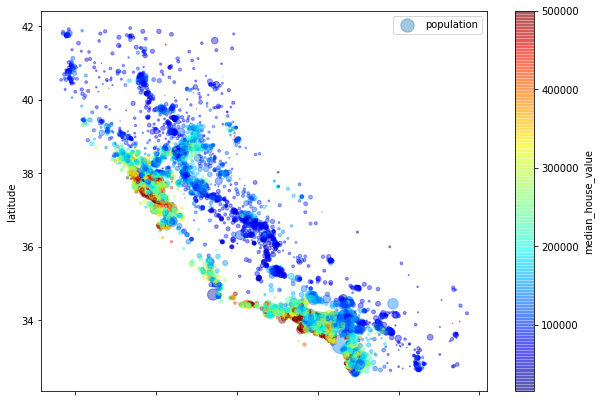

In [26]:
import matplotlib.pyplot as plt
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing['population']/100, label='population', 
             figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True
            )
plt.legend()

In [27]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fef6750>,
      dtype=object)

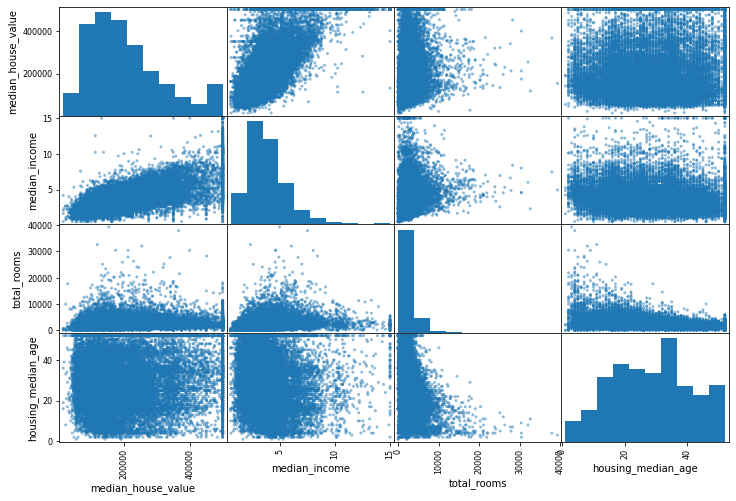

In [11]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

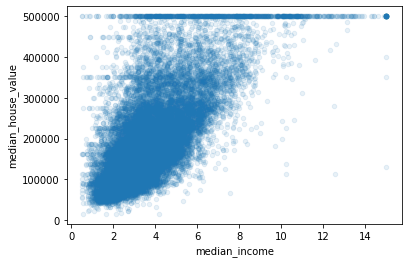

In [12]:
 housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.1)

In [29]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [30]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [87]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [34]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [289]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [366]:
# old way. its better to use new version
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
display(housing_cat_encoded[:10])
display(ordinal_encoder.categories_)

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [367]:
from sklearn.preprocessing import OneHotEncoder # new way to vectorize strings


cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [298]:
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [66]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [67]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix = housing.columns.get_loc('total_rooms'),housing.columns.get_loc('total_bedrooms')
population_ix, household_ix = housing.columns.get_loc('population'), housing.columns.get_loc('households')

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_household = X[:, bedrooms_ix] / X[:, household_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
# second variant of code above

from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False, kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
#     ('attribs_adder', CombinedAttributesAdder()),
    ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)), # second variant of code above
    ('std_scalar', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [119]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [121]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [191]:
cat_attribs

['ocean_proximity']

In [131]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
# первый тест прогнозов с выводом результатов
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f'Прогноз: {lin_reg.predict(some_data_prepared)}')
print(f'Метки: {list(some_labels)}')

Прогноз: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Метки: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [141]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
display(lin_mse)
display(lin_rmse)

4709829587.97112

68628.19819848922

In [144]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # RMSE ошибка = 0 на обучающих данных. скорее всего что модель переобучена (99.99%)

0.0

In [147]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [150]:
def display_scores(scores):
    print(f'Суммы оценок: {scores}')
    print(f'Среднее: {scores.mean()}')
    print(f'Стандартное отклонение: {scores.std()}')

In [168]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [158]:
display_scores(tree_rmse_scores)

Суммы оценок: [70108.20962068 64607.18570779 70907.60287018 69166.08799963
 70242.27240939 74824.59705588 69584.43611296 71977.31842279
 74766.49337503 71210.10696966]
Среднее: 70739.43105439859
Стандартное отклонение: 2770.3331351663323


In [169]:
display_scores(lin_rmse_scores)

Суммы оценок: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Среднее: 69052.46136345083
Стандартное отклонение: 2731.674001798348


In [176]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [165]:
display_scores(forest_rmse_scores)

Суммы оценок: [49562.52849188 47415.42613258 49786.98047164 52317.21563537
 49302.17304285 53448.0402972  49143.41605192 47948.18656441
 53292.89322267 50273.39148512]
Среднее: 50249.0251395642
Стандартное отклонение: 1997.5895795526046


In [170]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse # т.к. на тестовой выборке и единоразовой оч большое расхождение (последняя сильно меньше и лучше)
# то это говорит о явном переобучении

18702.219558115114

In [177]:
import joblib 

joblib.dump(lin_reg, "simple_lin_reg.pkl")
joblib.dump(tree_reg, "simple_tree_reg.pkl")
joblib.dump(forest_reg, "simple_forest_reg.pkl")

['clean_forest_reg.pkl']

In [178]:
test_lin_reg = joblib.load('simple_lin_reg.pkl')
test_lin_scores = cross_val_score(test_lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
test_lin_rmse_scores = np.sqrt(-test_lin_scores)
display_scores(test_lin_rmse_scores)

Суммы оценок: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Среднее: 69052.46136345083
Стандартное отклонение: 2731.674001798348


In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [181]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [182]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [185]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)


63213.78042854787 {'max_features': 2, 'n_estimators': 3}
54840.32378965432 {'max_features': 2, 'n_estimators': 10}
52912.02485901908 {'max_features': 2, 'n_estimators': 30}
59775.811507126964 {'max_features': 4, 'n_estimators': 3}
52788.77449323681 {'max_features': 4, 'n_estimators': 10}
50642.6188055316 {'max_features': 4, 'n_estimators': 30}
59692.22282653082 {'max_features': 6, 'n_estimators': 3}
52725.416196403865 {'max_features': 6, 'n_estimators': 10}
50067.707002672956 {'max_features': 6, 'n_estimators': 30}
58053.03271775538 {'max_features': 8, 'n_estimators': 3}
52492.7484066145 {'max_features': 8, 'n_estimators': 10}
49914.41451000719 {'max_features': 8, 'n_estimators': 30}
63231.650941701424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54832.258185754115 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60035.42886611325 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52618.11287195906 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [333]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances[0] < feature_importances[7])
display(feature_importances)
housing.info()

True


array([6.82827620e-02, 6.15544911e-02, 4.34701960e-02, 1.50684832e-02,
       1.57262676e-02, 1.47907240e-02, 1.37937550e-02, 3.82855623e-01,
       4.72593511e-02, 1.14225216e-01, 5.21631175e-02, 7.82163062e-03,
       1.56748611e-01, 6.27630505e-05, 1.80258387e-03, 4.37442431e-03])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [310]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.38285562308895543, 'median_income'),
 (0.15674861131000087, 'NEAR OCEAN'),
 (0.11422521615598938, 'INLAND'),
 (0.06828276195501454, 'longitude'),
 (0.06155449110463822, 'latitude'),
 (0.05216311751899706, 'ISLAND'),
 (0.04725935112393114, '<1H OCEAN'),
 (0.04347019602377403, 'housing_median_age'),
 (0.01572626763397705, 'total_bedrooms'),
 (0.015068483243631563, 'total_rooms'),
 (0.014790723984162845, 'population'),
 (0.013793755013418887, 'households'),
 (0.00782163061637938, 'NEAR BAY'),
 (0.004374424310476461, 'bedrooms_per_room'),
 (0.0018025838661530314, 'pop_per_hhold'),
 (6.276305050013884e-05, 'rooms_per_hhold')]

In [319]:
np.argpartition(np.array(feature_importances), 1)

array([13, 14,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0,  1, 15])

In [321]:
feature_importances

array([6.82827620e-02, 6.15544911e-02, 4.34701960e-02, 1.50684832e-02,
       1.57262676e-02, 1.47907240e-02, 1.37937550e-02, 3.82855623e-01,
       4.72593511e-02, 1.14225216e-01, 5.21631175e-02, 7.82163062e-03,
       1.56748611e-01, 6.27630505e-05, 1.80258387e-03, 4.37442431e-03])

In [322]:
feature_importances

array([6.82827620e-02, 6.15544911e-02, 4.34701960e-02, 1.50684832e-02,
       1.57262676e-02, 1.47907240e-02, 1.37937550e-02, 3.82855623e-01,
       4.72593511e-02, 1.14225216e-01, 5.21631175e-02, 7.82163062e-03,
       1.56748611e-01, 6.27630505e-05, 1.80258387e-03, 4.37442431e-03])

In [196]:
final_model = grid_search.best_estimator_

X_test =strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48124.148290599864

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid_svr = [
    {'kernel': ['linear'], 'C': [1,10,100]},
    {'kernel': ['rbf'], 'C': [1,10,100], 'gamma': [.01,.1,1]},
]

svr_reg = SVR()
grid_search_svr = GridSearchCV(svr_reg, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=6)
grid_search_svr.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=6,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid_svr = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_reg = SVR()
grid_search_svr = GridSearchCV(svr_reg, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=8)
grid_search_svr.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [211]:
cvres2 = grid_search_svr.cv_results_
for mean_score, params in zip(cvres2['mean_test_score'], cvres2['params']):
    print(np.sqrt(-mean_score), params)

84654.24944894915 {'C': 10.0, 'kernel': 'linear'}
75448.97722080236 {'C': 30.0, 'kernel': 'linear'}
71603.17710755806 {'C': 100.0, 'kernel': 'linear'}
70703.96434485051 {'C': 300.0, 'kernel': 'linear'}
70445.3835347414 {'C': 1000.0, 'kernel': 'linear'}
70395.04242174576 {'C': 3000.0, 'kernel': 'linear'}
70374.76833985467 {'C': 10000.0, 'kernel': 'linear'}
70363.84006944533 {'C': 30000.0, 'kernel': 'linear'}
118810.30512885563 {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
118692.99130284463 {'C': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
118638.14057023903 {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
118768.3401960818 {'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}
118886.58611084612 {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
118916.21318237013 {'C': 1.0, 'gamma': 3.0, 'kernel': 'rbf'}
118596.16891020472 {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}
118256.54516476246 {'C': 3.0, 'gamma': 0.03, 'kernel': 'rbf'}
118077.86879656409 {'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}
118460.90805382353 {'C': 3.0, 'gamma'

In [213]:
grid_search_svr.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [364]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svr_reg = SVR()
random_grid_search_full_svr = RandomizedSearchCV(svr_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=8, random_state=42)
random_grid_search_full_svr.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  8.3min
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed: 13.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14a888610>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14a8712d0>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [225]:
random_grid_search_svr.best_estimator_

SVR(C=157055.10989448498, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.26497040005002437, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [365]:
np.sqrt(-random_grid_search_full_svr.best_score_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

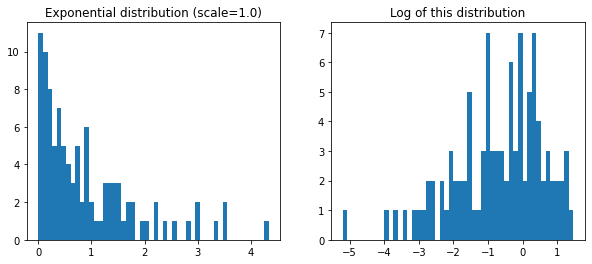

In [279]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

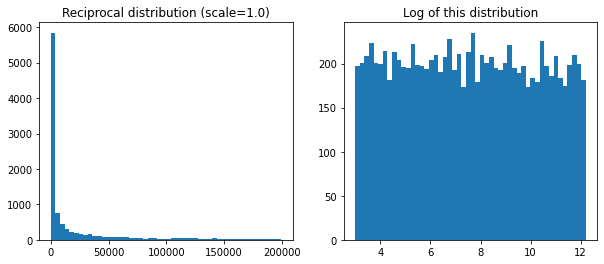

In [246]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [370]:
k = 5

In [334]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]


In [346]:
grid_search.best_estimator_.feature_importances_

array([6.82827620e-02, 6.15544911e-02, 4.34701960e-02, 1.50684832e-02,
       1.57262676e-02, 1.47907240e-02, 1.37937550e-02, 3.82855623e-01,
       4.72593511e-02, 1.14225216e-01, 5.21631175e-02, 7.82163062e-03,
       1.56748611e-01, 6.27630505e-05, 1.80258387e-03, 4.37442431e-03])

In [354]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [355]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [361]:
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svr_reg = SVR()
random_grid_search_svr = RandomizedSearchCV(svr_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=8, random_state=42)
random_grid_search_svr.fit(housing_prepared_top_k_features, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   53.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:  6.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=8,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14a888610>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14a8712d0>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [363]:
np.sqrt(-random_grid_search_svr.best_score_)

57636.97179545856

In [371]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**random_grid_search_svr.best_params_))
])

In [372]:
res = prepare_select_and_predict_pipeline.fit(housing, housing_labels)

In [374]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [203214.28978849 371846.88152572 173295.65441612  47328.3970888 ]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


In [375]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=8)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   48.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  5.9min
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed: 14.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                     